# Patching the grids together

### grid parameters

In [88]:
# Specify the grid properties
# All
# Specify the desired resolution

def get_grid_parameters(degree_resolution_inverse = 2):
    refineS=2    # Set to 2 for supergrid
    refineR=degree_resolution_inverse  
    lenlon=360  # global longitude range
    lon0=-300.  # Starting longitude (longitude of the Northern bipoles)
    Ni     =refineR*refineS* lenlon #To get the desired resolution at the equator
    
    Nj_ncap=refineR* 120   #MIDAS has refineS*( 240 for 1/4 degree, 119 for 1/2 degree
    Nj_SO  =refineR*  55   #MIDAS has refineS*( 110 for 1/4 degree,  54 for 1/2 degree
    Nj_scap=refineR*  40   #MIDAS has refineS*(  80 for 1/4 degree, ??? for 1/2 degree
    #Nj_Merc=UNUSED        #MIDAS has refineS*( 700 for 1/4 degree, 364 for 1/2 degree
    #Niki: Where do these factors come from?

    #Mercator grid
    #MIDAS has nominal starting latitude for Mercator grid = -65 for 1/4 degree, -70 for 1/2 degree
    #MIDAS has nominal latitude range of Mercator grid     = 125 for 1/4 degree, 135 for 1/2 degree
    #Instead we use the actual values used in MIDAS 1/8 degree grid

    phi_s_Merc, phi_n_Merc = -66.85954724706843, 64.0589597296948
    
    #To reproduce older grids
    if(degree_resolution_inverse == 2):
        phi_s_Merc, phi_n_Merc = -68.05725377, 64.76080366
        
    #Northern bipolar cap
    lon_bp=lon0 # longitude of the displaced pole(s)
    lat0_bp=phi_n_Merc 
    lenlat_bp=90.0-lat0_bp

    #Southern Ocean grid
    lat0_SO=-78.0
    lenlat_SO = phi_s_Merc-lat0_SO 

    #Southern cap
    lon_dp=100.0   # longitude of the displaced pole 
    r_dp=0.20
    doughnut=0.12
    
    return Ni,phi_s_Merc, phi_n_Merc,lon0,lenlon,Nj_ncap,Nj_SO,Nj_scap


In [45]:
import imp  
import ocean_grid_generator as ogg
import matplotlib.pyplot as plt
%matplotlib inline

## Mercator grid

In [74]:
#This is how the 1/8 degree grid was generated for the JRA runs. 
#The sub-supergrids did not have even number of cells, but the global supergrid did.
imp.reload(ogg)  
Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon,Nj_ncap,Nj_SO,Nj_scap = get_grid_parameters(degree_resolution_inverse = 2)
lamMerc,phiMerc = ogg.generate_mercator_grid(Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon,ensure_nj_even=False)    

#ogg.plot_mesh_in_xyz(lamMerc,phiMerc, stride=30,lowerlat=30);

Requesting Mercator grid with phi range: phi_s,phi_n= -66.85954724706843 64.0589597296948
y*= [-364  337] nj= 702
Equator is not going to be a u-point!
Fixing this by shifting the bounds!
y*= [-365  336] nj= 702
Generating Mercator grid with phi range: phi_s,phi_n= [-67.00647442  64.00422531]
Equator is at j= 365


## Northern bipolar cap grid

In [75]:
imp.reload(ogg) 
Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon,Nj_ncap,Nj_SO,Nj_scap = get_grid_parameters(degree_resolution_inverse = 2)
lamBP,phiBP = ogg.generate_bipolar_cap_grid(Ni,Nj_ncap,phi_n_Merc,lon0,lenlon)

#ogg.plot_mesh_in_xyz(lamBP, phiBP, stride=20)

Generating bipolar grid bounded at latitude  64.0589597296948
   number of js= 241


In [76]:
print("Last  lattitude of Mercator",phiMerc[-1,0])
print("First lattitude of Bipolar ",phiBP[0,0])
print("DM  ",phiMerc[-1,Ni//4]-phiMerc[-2,Ni//4])
print("DMB ",phiBP[0,Ni//4]-phiMerc[-1,Ni//4])
print("DB  ",phiBP[1,Ni//4]-phiBP[0,Ni//4])


Last  lattitude of Mercator 64.004225313
First lattitude of Bipolar  64.0589597297
DM   0.10979130175
DMB  0.0547344167421
DB   0.108087667793


### visualize Northern grids together

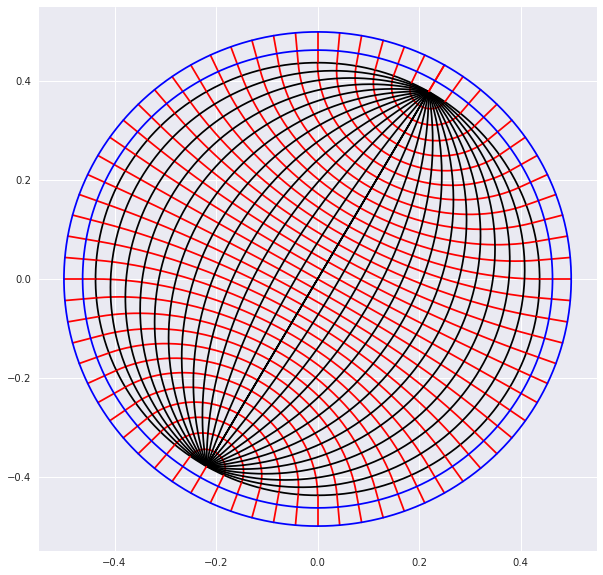

In [78]:
plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lamBP, phiBP, stride=20,newfig=False)
ogg.plot_mesh_in_xyz(lamMerc,phiMerc, phi_color='b', stride=20,lowerlat=60,newfig=False)


Note that the double line at the joint is a plotting artifact due to the setting a stride.

### bipolar grid produced by FMS/MIDAS

Generating FMS bipolar grid bounded at latitude  64.0590671656
   number of js= 480


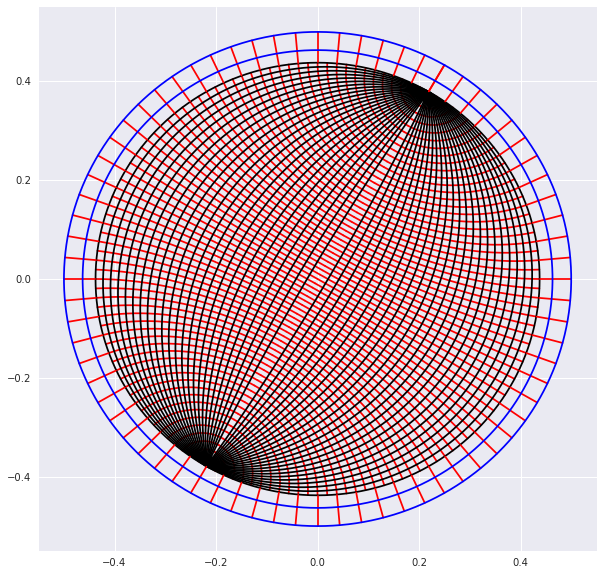

In [124]:
lenlat_bp=90.0-lat0_bp
lams_fms, phis_fms= ogg.generate_bipolar_cap_grid_fms(Ni,Nj_ncap-1,lat0_bp,lon0,lenlon,lenlat_bp)
plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lams_fms, phis_fms, stride=20);
ogg.plot_mesh_in_xyz(lamMerc,phiMerc, phi_color='b', stride=20,lowerlat=60,newfig=False);


## Southern Ocean and Cap

In [128]:
#Southern Ocean 
lat0_SO=-78.0
lenlat_SO = phi_s_Merc-lat0_SO 

lamSO,phiSO = ogg.generate_latlon_grid(Ni,Nj_SO,lon0,lenlon,lat0_SO,lenlat_SO)

lon_dp=100.0   # longitude of the displaced pole 
r_dp =0.0
doughnut=0.0
lamc_DP,phic_DP = ogg.generate_displaced_pole_grid(Ni,Nj_scap,lon0,lenlon,lon_dp,r_dp,lat0_SO,doughnut)

#plot grid
plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lamc_DP,phic_DP, stride=30)

print("Last  lattitude of Mercator",phiMerc[-1,0])
print("First lattitude of Bipolar ",phiBP[0,0])
print("DM  ",phiMerc[1,Ni//4]-phiMerc[0,Ni//4])
print("DMB ",phiMerc[0,Ni//4]-phiSO[-1,Ni//4])
print("DB  ",phiSO[-1,Ni//4]-phiSO[-2,Ni//4])


Last  lattitude of Mercator 64.004225313
First lattitude of Bipolar  64.0590671656
DM   0.04917260638
DMB  0.0
DB   0.0506384216042


### Mercator join with Southern ocean and Southern cap

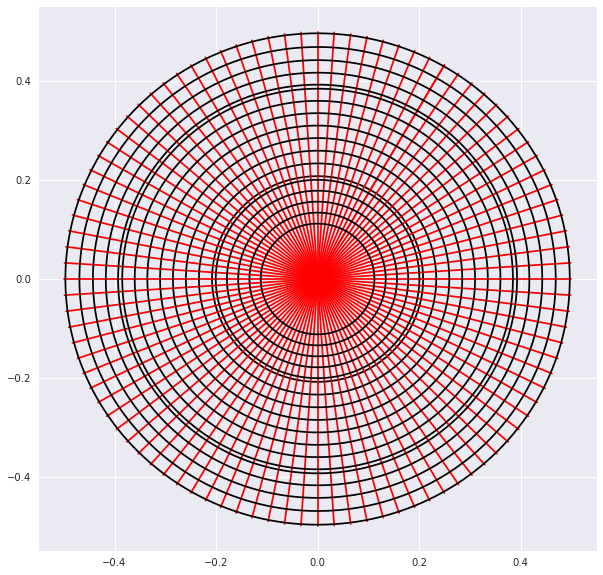

In [127]:
plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lamSO,phiSO, stride=30,newfig=False)
ogg.plot_mesh_in_xyz(lamc_DP,phic_DP, stride=30,newfig=False)
ogg.plot_mesh_in_xyz(lamMerc2,phiMerc2, stride=30, upperlat=-60,newfig=False)


<Figure size 720x720 with 0 Axes>

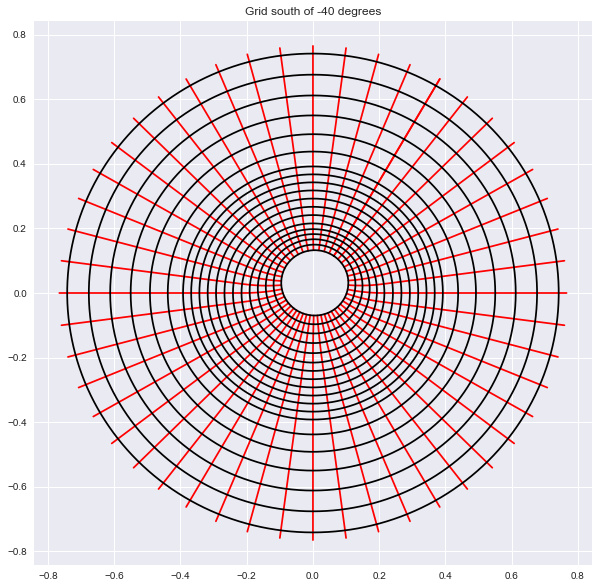

In [46]:
lam1=np.concatenate((lamc_DP,lamSO),axis=0)
phi1=np.concatenate((phic_DP,phiSO),axis=0)

lam2=np.concatenate((lam1,lamMerc),axis=0)
phi2=np.concatenate((phi1,phiMerc),axis=0)


plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lam2,phi2, stride=30,upperlat=-40, title="Grid south of -40 degrees")


<Figure size 720x720 with 0 Axes>

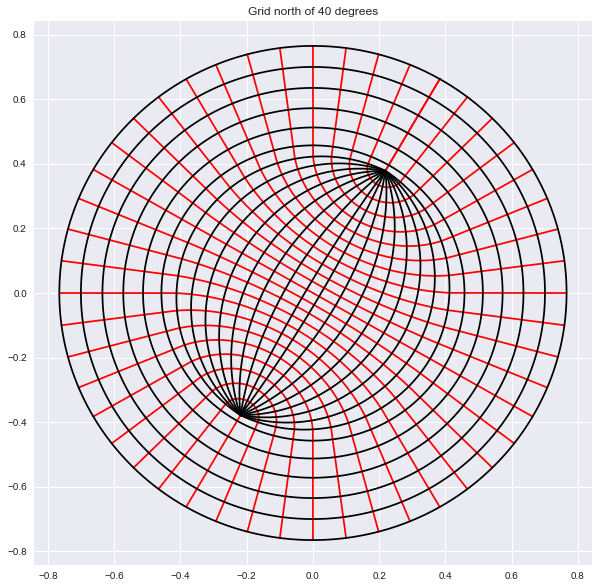

In [47]:
lam3=np.concatenate((lam2,lamBP),axis=0)
phi3=np.concatenate((phi2,phiBP),axis=0)


plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lam3,phi3, stride=30,lowerlat=40, title="Grid north of 40 degrees")


In [48]:
#generate the metrics
dx3,dy3,area3,angle3 = ggg.generate_grid_metrics(lam3,phi3,axis_units='degrees')

#write the grid file
grid_file_name = 'tripolar_grid_'+str(degree_resolution_inverse)+'.nc'
ggg.write_nc(lam3,phi3,dx3,dy3,area3,angle3,axis_units='degrees',fnam=grid_file_name)


## Smoothing 

(py3) Niki.Zadeh: /net2/nnz/grid_generation/workdir $ ../ocean_grid_generator.py -f tripolar_res4_areacorrected.nc -r 4 --south_cutoff_row 81


Requesting Mercator grid with phi range: phi_s,phi_n= -66.85954724706843 64.0589597296948
   y*= [-727  673] nj= 1401
   Supergrid has an odd number of area cells!
   Fixing this by shifting the y_star[1] 
   y*= [-727  672] nj= 1400
   Generating Mercator grid with phi range: phi_s,phi_n= [-66.85954725  64.00422531]
   Equator is at j= 727
   number of js= 1400
Generating bipolar grid bounded at latitude  64.0590671656
   number of js= 480
Last  lattitude of Mercator 64.004225313
First lattitude of Bipolar  64.0590671656
DM   0.0548418526513
DMB  0.0548418526513
DB   0.0541564359799
Generating regular lat-lon grid between latitudes  -78.0 -66.9087198534
   The number of j's is not even. Fixing this by cutting one row at south.
   generated regular lat-lon grid between latitudes  -77.9509235392 -66.9087198534
   number of js= 226
First lattitude of Mercator -66.8595472471
Last  lattitude of SO       -66.9087198534
DM   0.04917260638
DMSO 0.04917260638
DSO  0.0490764608254
DSO  0.049076

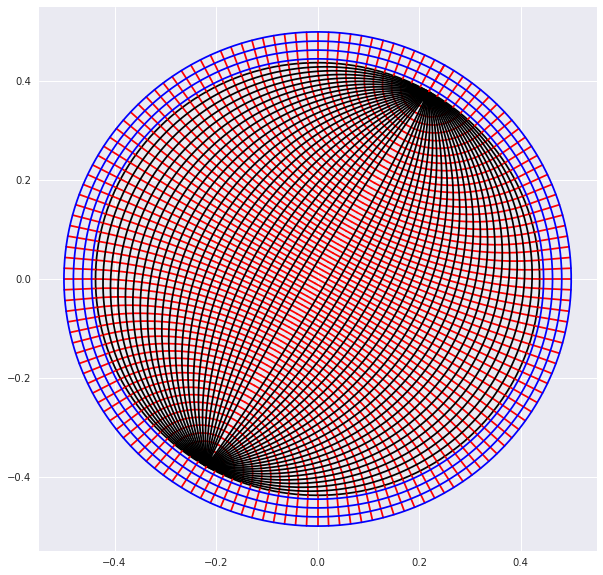

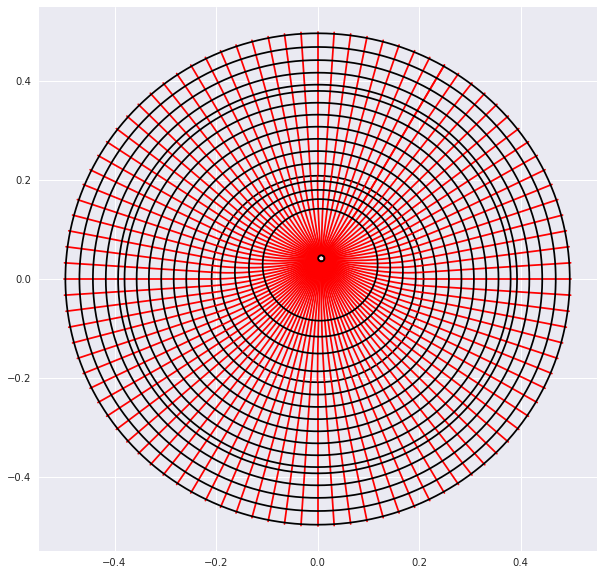

In [225]:
def get_grid_parameters2(degree_resolution_inverse = 2):
    refineS=2    # Set to 2 for supergrid
    refineR=degree_resolution_inverse  
    lenlon=360  # global longitude range
    lon0=-300.  # Starting longitude (longitude of the Northern bipoles)
    Ni     =refineR*refineS* lenlon #To get the desired resolution at the equator
    
    Nj_ncap=refineR* 120 - 1   #MIDAS has refineS*( 240 for 1/4 degree, 119 for 1/2 degree
    Nj_scap=refineR*  40   #MIDAS has refineS*(  80 for 1/4 degree, ??? for 1/2 degree
    #Nj_Merc=UNUSED        #MIDAS has refineS*( 700 for 1/4 degree, 364 for 1/2 degree
    #Niki: Where do these factors come from?
    #Mercator grid
    #MIDAS has nominal starting latitude for Mercator grid = -65 for 1/4 degree, -70 for 1/2 degree
    #MIDAS has nominal latitude range of Mercator grid     = 125 for 1/4 degree, 135 for 1/2 degree
    #Instead we use the actual values used in MIDAS 1/8 degree grid
    phi_s_Merc, phi_n_Merc = -66.85954724706843, 64.0589597296948
    #Northern bipolar cap
    lon_bp=lon0 # longitude of the displaced pole(s)
    lat0_bp=phi_n_Merc 
    lenlat_bp=90.0-lat0_bp
    #Southern Ocean grid
    lat0_SO=-78.0
    lenlat_SO = phi_s_Merc-lat0_SO 
    #Southern cap
    lon_dp=100.0   # longitude of the displaced pole 
    r_dp=0.20
    doughnut=0.12    
    return Ni,phi_s_Merc, phi_n_Merc,lon0,lenlon,Nj_ncap,Nj_scap

#If we require that the sub-supergrids have even number of cells we get a slightly different grid.
imp.reload(ogg)  
import math

Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon,Nj_ncap,Nj_scap = get_grid_parameters2(degree_resolution_inverse=4)

#Generate the Mercator grid 
lamMerc2,phiMerc2 = ogg.generate_mercator_grid(Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon,ensure_nj_even=True)    
#The phi resolution in the last row of Mercator grid along the symmetry meridian
DeltaPhiMerc2_so = phiMerc2[ 1,Ni//4]-phiMerc2[ 0,Ni//4]
DeltaPhiMerc2_no = phiMerc2[-1,Ni//4]-phiMerc2[-2,Ni//4]

#Generate the Bipolar grid. 
lat0_bp = phiMerc2[-1,Ni//4] + DeltaPhiMerc2_no #Start from a lattitude to smooth out dy.
lamBP2,phiBP2 = ogg.generate_bipolar_cap_grid(Ni,Nj_ncap,lat0_bp,lon0,lenlon)

#ogg.plot_mesh_in_xyz(lamBP, phiBP, stride=20)

print("Last  lattitude of Mercator",phiMerc2[-1,0])
print("First lattitude of Bipolar ",phiBP2[0,0])
print("DM  ",phiMerc2[-1,Ni//4]-phiMerc2[-2,Ni//4])
print("DMB ",phiBP2[0,Ni//4]-phiMerc2[-1,Ni//4])
print("DB  ",phiBP2[1,Ni//4]-phiBP2[0,Ni//4])

#Generate the Southern Ocean grid
lat0_SO=-78.0
lenlat_SO = phiMerc2[0,Ni//4] - DeltaPhiMerc2_so - lat0_SO #Start from a lattitude to smooth out dy.
Nj_SO = math.floor(0.5 + lenlat_SO/DeltaPhiMerc2_so) #nearest integer
lamSO,phiSO = ogg.generate_latlon_grid(Ni,Nj_SO,lon0,lenlon,lat0_SO,lenlat_SO)

print("First lattitude of Mercator",phiMerc2[0,0])
print("Last  lattitude of SO      ",phiSO[-1,0])
print("DM  ",phiMerc2[1,Ni//4]-phiMerc2[0,Ni//4])
print("DMSO",phiMerc2[0,Ni//4]-phiSO[-1,Ni//4])
print("DSO ",phiSO[-1,Ni//4]-phiSO[-2,Ni//4])
print("DSO ",phiSO[1,Ni//4]-phiSO[0,Ni//4])


#Generate the southern cap grid
lon_dp=100.0   # longitude of the displaced pole 
r_dp =0.2
doughnut=0.0
deltaPhiSO = phiSO[1,Ni//4]-phiSO[0,Ni//4]
lat0_SC=phiSO[0,Ni//4]-deltaPhiSO
fullArc = lat0_SC+90.
halfArc = fullArc/2
#halfArc = lat0_SC - 0.5*(lat0_SC-90.)
nparts=8
Nj_scap = int((nparts/(nparts-1))*halfArc/deltaPhiSO)
#Nj_scap = refineR *  40   #MIDAS has refineS*(  80 for 1/4 degree, ??? for 1/2 degree
lamc_DP,phic_DP = ogg.generate_displaced_pole_grid(Ni,Nj_scap,lon0,lenlon,lon_dp,r_dp,lat0_SC,doughnut,nparts)

print("First lattitude of SO ",phiSO[0,0])
print("Last  lattitude of DP ",phic_DP[-1,0])
print("DSO ",phiSO[1,Ni//4]-phiSO[0,Ni//4])
print("DSS ",phiSO[0,Ni//4]-phic_DP[-1,Ni//4])
print("DSC ",phic_DP[-1,Ni//4]-phic_DP[-2,Ni//4])
print("DSC ",phic_DP[1,Ni//4]-phic_DP[0,Ni//4])


#plot grids

plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lamBP2, phiBP2, stride=20,newfig=False)
ogg.plot_mesh_in_xyz(lamMerc2,phiMerc2, phi_color='b', stride=20,lowerlat=60,newfig=False)

plt.figure(figsize=(10,10))
ogg.plot_mesh_in_xyz(lamSO,phiSO, stride=30,newfig=False)
ogg.plot_mesh_in_xyz(lamc_DP,phic_DP, stride=30,newfig=False)
ogg.plot_mesh_in_xyz(lamMerc2,phiMerc2, stride=30, upperlat=-60,newfig=False)


In [189]:
import numpy as np
def generate_latlon_grid2(lni,lnj,llon0,llen_lon,llat0,llen_lat, ensure_nj_even=True):
    print('Generating regular lat-lon grid between latitudes ', llat0, llat0+llen_lat)
    llonSP = llon0 + np.arange(lni+1) * llen_lon/lni
    llatSP = llat0 + np.arange(lnj+1) * llen_lat/lnj
    print(lni,llonSP.shape[0])
    print(lnj,llatSP.shape[0])
    if(llatSP.shape[0]%2 != 0 and ensure_nj_even):
        print("   The number of j's is not even. Fixing this by cutting one row at south.")
        llatSP = np.delete(llatSP,0,0)
    
    llamSP = np.tile(llonSP,(llatSP.shape[0],1)) 
    lphiSP = np.tile(llatSP.reshape((llatSP.shape[0],1)),(1,llonSP.shape[0]))
    
    print('   generated regular lat-lon grid between latitudes ', lphiSP[0,0],lphiSP[-1,0])
    print('   number of js=',lphiSP.shape[0])
    return llamSP,lphiSP

lamSO,phiSO = generate_latlon_grid2(Ni,Nj_SO,lon0,lenlon,lat0_SO,lenlat_SO)


Generating regular lat-lon grid between latitudes  -78.0 -66.9087198534
2880 2881
226 227
   The number of j's is not even. Fixing this by cutting one row at south.
   generated regular lat-lon grid between latitudes  -77.9509235392 -66.9087198534
   number of js= 226


In [180]:
int(0.5+0.5)

1

In [207]:
halfArc = lat0_SC - 0.5*(lat0_SC-90.)
deltaSO = phiSO[1,Ni//4]-phiSO[0,Ni//4]
n= 8*halfArc/(7*deltaSO)
n

139.7236626645124

In [199]:
a[-1]-a[-2]

1.1111111111111143